In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import SARIMAX
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import itertools
import statsmodels.api as sm

# Data Visualization

link to tableau

In [2]:
marvel_comics = pd.read_csv('marvel_comics.csv')

In [3]:
marvel_comics.head()

,comic_name,active_years,issue_title,publish_date,issue_description,penciler,writer,cover_artist,Imprint,Format,Rating,Price
0,A Year of Marvels: April Infinite Comic (2016),(2016),A Year of Marvels: April Infinite Comic (2016) #1,"April 01, 2016",The Infinite Comic that will have everyone tal...,Yves Bigerel,Yves Bigerel,Jamal Campbell,Marvel Universe,Infinite Comic,Rated T+,Free
1,A Year of Marvels: August Infinite Comic (2016),(2016),A Year of Marvels: August Infinite Comic (2016...,"August 10, 2016","It’s August, and Nick Fury is just in time to ...",Jamal Campbell,"Chris Sims, Chad Bowers",None,Marvel Universe,Infinite Comic,None,Free
2,A Year of Marvels: February Infinite Comic (2016),(2016),A Year of Marvels: February Infinite Comic (20...,"February 10, 2016",Join us in a brand new Marvel comics adventure...,"Danilo S. Beyruth, M Mast",Ryan North,None,Marvel Universe,Infinite Comic,Rated T+,Free
3,A Year of Marvels: July Infinite Comic (2016),(2016),A Year of Marvels: July Infinite Comic (2016) #1,"June 29, 2016",Celebrating the Fourth of July is complicated ...,Juanan Ramirez,Chuck Wendig,Jamal Campbell,Marvel Universe,Infinite Comic,None,Free
4,A Year of Marvels: June Infinite Comic (2016),(2016),A Year of Marvels: June Infinite Comic (2016) #1,"June 15, 2016",Sam Alexander’s finding it hard to cope with t...,Diego Olortegui,Paul Allor,Jamal Campbell,Marvel Universe,Infinite Comic,None,Free


In [4]:
marvel_comics.shape

(34992, 12)

In [5]:
marvel_comics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34992 entries, 0 to 34991
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   comic_name         34992 non-null  object
 1   active_years       34992 non-null  object
 2   issue_title        34992 non-null  object
 3   publish_date       34992 non-null  object
 4   issue_description  34992 non-null  object
 5   penciler           34992 non-null  object
 6   writer             34992 non-null  object
 7   cover_artist       34992 non-null  object
 8   Imprint            34992 non-null  object
 9   Format             34992 non-null  object
 10  Rating             34992 non-null  object
 11  Price              34992 non-null  object
dtypes: object(12)
memory usage: 3.2+ MB


In [6]:
marvel_comics.nunique()

comic_name            4935
active_years           412
issue_title          33758
publish_date          3318
issue_description    29332
penciler              3916
writer                3083
cover_artist          1011
Imprint                 40
Format                  12
Rating                  37
Price                   54
dtype: int64

# Summary Stats

## Exploratory Data Analysis

In [7]:
# read in marvel_movies.csv
marvel_movies = pd.read_csv('marvel_movies.csv')
marvel_movies.head()

,film,category,worldwide gross ($m),% budget recovered,critics % score,audience % score,audience vs critics % deviance,budget,domestic gross ($m),international gross ($m),opening weekend ($m),second weekend ($m),1st vs 2nd weekend drop off,% gross from opening weekend,% gross from domestic,% gross from international,% budget opening weekend,year,source
0,Ant-Man,Ant-Man,518,398%,83%,85%,-2%,130.0,180,338,57.0,24.0,-58%,31.8,34.7%,65.3%,43.8%,2015,https://www.the-numbers.com/movie/Ant-Man#tab=...
1,Ant-Man & The Wasp,Ant-Man,623,479%,87%,80%,7%,130.0,216,406,75.8,29.0,-62%,35.0,34.7%,65.2%,58.3%,2018,https://www.the-numbers.com/movie/Ant-Man-and-...
2,Avengers: Age of Ultron,Avengers,1395,382%,76%,82%,-6%,365.0,459,936,191.0,77.0,-60%,41.7,32.9%,67.1%,52.3%,2015,https://www.the-numbers.com/movie/Avengers-Age...
3,Avengers: End Game,Avengers,2797,699%,94%,90%,4%,400.0,858,1939,357.0,147.0,-59%,41.6,30.7%,69.3%,89.3%,2019,https://www.the-numbers.com/movie/Avengers-End...
4,Avengers: Infinity War,Avengers,2048,683%,85%,91%,-6%,300.0,678,1369,257.0,114.0,-56%,38.0,33.1%,66.8%,85.7%,2018,https://www.the-numbers.com/movie/Avengers-Inf...


In [8]:
marvel_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   film                            30 non-null     object 
 1   category                        30 non-null     object 
 2   worldwide gross ($m)            30 non-null     int64  
 3   % budget recovered              30 non-null     object 
 4   critics % score                 30 non-null     object 
 5   audience % score                30 non-null     object 
 6   audience vs critics % deviance  30 non-null     object 
 7   budget                          30 non-null     float64
 8   domestic gross ($m)             30 non-null     int64  
 9   international gross ($m)        30 non-null     int64  
 10  opening weekend ($m)            30 non-null     float64
 11  second weekend ($m)             30 non-null     float64
 12  1st vs 2nd weekend drop off     30 non

In [9]:
# all the % columns are listed as objects. need to convert to int 
columns_to_convert = [
    '% budget recovered',
    'critics % score',
    'audience % score',
    'audience vs critics % deviance',
    '1st vs 2nd weekend drop off',
    '% gross from domestic',
    '% gross from international',
    '% budget opening weekend'
]

for column in columns_to_convert:
    marvel_movies[column] = marvel_movies[column].apply(lambda x: int(float(str(x).replace('%', '').replace(',', ''))) if pd.notna(x) else None)

In [10]:
print(f'Rows: {marvel_movies.shape[0]}')
print(f'Columns: {marvel_movies.shape[1]}')

Rows: 30
Columns: 19


In [11]:
marvel_movies.describe()

,worldwide gross ($m),% budget recovered,critics % score,audience % score,audience vs critics % deviance,budget,domestic gross ($m),international gross ($m),opening weekend ($m),second weekend ($m),1st vs 2nd weekend drop off,% gross from opening weekend,% gross from domestic,% gross from international,% budget opening weekend,year
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,940.866667,457.033333,82.566667,82.233333,0.333333,199.283333,370.900000,569.433333,136.770000,57.390000,-57.766667,38.070000,40.766667,58.300000,66.033333,2016.266667
std,563.119068,181.228087,11.263868,11.031876,9.437027,63.656362,193.394603,387.182634,71.790822,30.440154,6.072455,5.439457,7.271500,7.358551,21.840303,4.176563
min,265.000000,190.000000,47.000000,45.000000,-26.000000,130.000000,134.000000,130.000000,55.000000,22.100000,-68.000000,23.700000,30.000000,45.000000,35.000000,2008.000000
25%,594.000000,321.750000,77.500000,76.250000,-2.750000,161.250000,218.000000,315.500000,81.475000,35.150000,-62.000000,35.000000,34.000000,52.500000,51.250000,2013.250000
50%,810.000000,432.000000,85.000000,85.500000,0.000000,183.000000,333.500000,448.500000,119.500000,48.900000,-58.000000,37.800000,40.000000,59.000000,58.000000,2017.000000
75%,1146.250000,581.500000,91.000000,91.000000,3.000000,200.000000,422.250000,731.250000,180.500000,71.350000,-54.250000,41.925000,46.750000,65.000000,82.500000,2019.000000
max,2797.000000,956.000000,96.000000,96.000000,34.000000,400.000000,858.000000,1939.000000,357.000000,147.000000,-45.000000,48.600000,54.000000,69.000000,130.000000,2022.000000


<Figure size 1000x600 with 0 Axes>

<AxesSubplot:xlabel='opening weekend ($m)', ylabel='Density'>

<AxesSubplot:xlabel='opening weekend ($m)', ylabel='Density'>

Text(0.5, 1.0, 'Density Plot of Weekend Revenue')

Text(0.5, 0, 'Revenue')

Text(0, 0.5, 'Density')

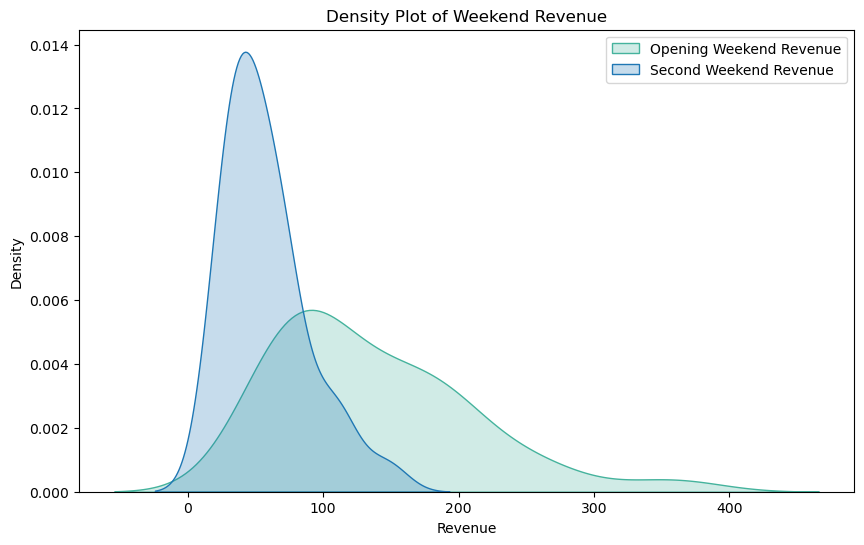

In [12]:
# weekend revenue
plt.figure(figsize=(10, 6))

# Plot the density for opening weekend revenue
sns.kdeplot(marvel_movies['opening weekend ($m)'], fill=True, label='Opening Weekend Revenue', color = '#45b39d')

# Overlay the density for second weekend revenue
sns.kdeplot(marvel_movies['second weekend ($m)'], fill=True, label='Second Weekend Revenue')

plt.title('Density Plot of Weekend Revenue')
plt.xlabel('Revenue')
plt.ylabel('Density')
plt.legend()
plt.show()

In [13]:
# create a new column containing the exact release date found on Google
release_dates = pd.to_datetime([
    '2015-07-17', '2018-07-06', '2015-05-01', '2019-04-26', '2018-04-27', '2018-02-16',
    '2022-11-11', '2021-07-09', '2011-07-22', '2016-05-06', '2014-04-04', '2019-03-08',
    '2016-11-04', '2022-05-06', '2021-11-05', '2014-08-01', '2017-05-05', '2008-06-13',
    '2008-05-02', '2010-05-07', '2013-05-03', '2021-09-03', '2019-07-02', '2017-07-07',
    '2021-12-17', '2012-05-04', '2013-11-08', '2022-07-08', '2017-11-03', '2011-05-06'
])

# Append the 'Release Date' column to the 'marvel_movies' DataFrame
marvel_movies['release date'] = release_dates

Text(0.5, 0, 'Release Date')

Text(0, 0.5, 'Gross Revenue ($m)')

Text(0.5, 1.0, 'Time Series Visualization of Gross Revenue')

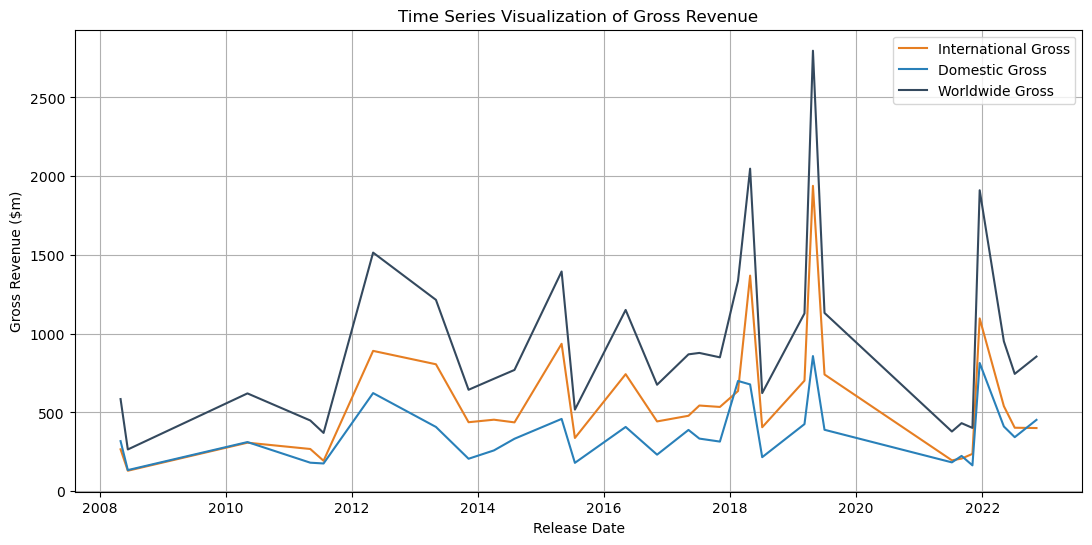

In [14]:
marvel_movies_sorted_date = marvel_movies.set_index('release date')
marvel_movies_sorted_date.sort_index(inplace=True)

# Plotting the time series for gross revenue
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(marvel_movies_sorted_date['international gross ($m)'], color='#e67e22', label='International Gross')
ax.plot(marvel_movies_sorted_date['domestic gross ($m)'], color='#2980b9', label='Domestic Gross')
ax.plot(marvel_movies_sorted_date['worldwide gross ($m)'], color='#34495e', label='Worldwide Gross')

# Adding labels and title
plt.xlabel('Release Date')
plt.ylabel('Gross Revenue ($m)')
plt.title('Time Series Visualization of Gross Revenue')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
print(marvel_movies['category'].value_counts())

Unique             5
Avengers           4
Thor               4
Captain America    3
Iron Man           3
Spider-Man         3
Ant-Man            2
Black Panther      2
Dr Strange         2
Guardians          2
Name: category, dtype: int64


<Figure size 1000x600 with 0 Axes>

Text(Ant-Man, 83, 'Ant-Man  ')

Text(Ant-Man, 87, 'Ant-Man & The Wasp')

Text(Avengers, 76, 'Avengers: Age of Ultron')

Text(Avengers, 94, 'Avengers: End Game')

Text(Avengers, 85, 'Avengers: Infinity War')

Text(Black Panther, 96, 'Black Panther')

Text(Black Panther, 84, 'Black Panther 2')

Text(Black Widow, 79, 'Black Widow')

Text(Captain America, 79, 'Captain America')

Text(Captain America, 90, 'Captain America: Civil War')

Text(Captain America, 90, 'Captain America: Winter Soldier')

Text(Captain Marvel, 79, 'Captain Marvel')

Text(Dr Strange, 89, 'Dr Strange')

Text(Dr Strange, 74, 'Dr Strange: Multiverse of Madness')

Text(Eternals, 47, 'Eternals')

Text(Guardians, 92, 'Guardians of the Galaxy')

Text(Guardians, 85, 'Guardians of the Galaxy 2')

Text(Hulk, 67, 'Incredible Hulk')

Text(Iron Man, 94, 'Iron Man')

Text(Iron Man, 71, 'Iron Man 2')

Text(Iron Man, 79, 'Iron Man 3')

Text(Shang-Chi, 91, 'Shang-Chi')

Text(Spider-Man, 90, 'Spider-Man: Far from Home')

Text(Spider-Man, 92, 'Spider-Man: Homecoming')

Text(Spider-Man, 93, 'Spider-Man: No Way Home')

Text(Avengers, 91, 'The Avengers')

Text(Thor, 66, 'Thor: Dark World')

Text(Thor, 64, 'Thor: Love & Thunder')

Text(Thor, 93, 'Thor: Ragnarok')

Text(Thor, 77, 'Thor')

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Critics Score (%)')

Text(0.5, 1.0, 'Scatter Plot of Critics Scores by Category')

([<matplotlib.axis.XTick at 0x7fe530a30700>,
 [Text(0, 0, 'Ant-Man'),
  Text(1, 0, 'Avengers'),
  Text(2, 0, 'Black Panther'),
  Text(3, 0, 'Black Widow'),
  Text(4, 0, 'Captain America'),
  Text(5, 0, 'Captain Marvel'),
  Text(6, 0, 'Dr Strange'),
  Text(7, 0, 'Eternals'),
  Text(8, 0, 'Guardians'),
  Text(9, 0, 'Hulk'),
  Text(10, 0, 'Iron Man'),
  Text(11, 0, 'Shang-Chi'),
  Text(12, 0, 'Spider-Man'),
  Text(13, 0, 'Thor')])

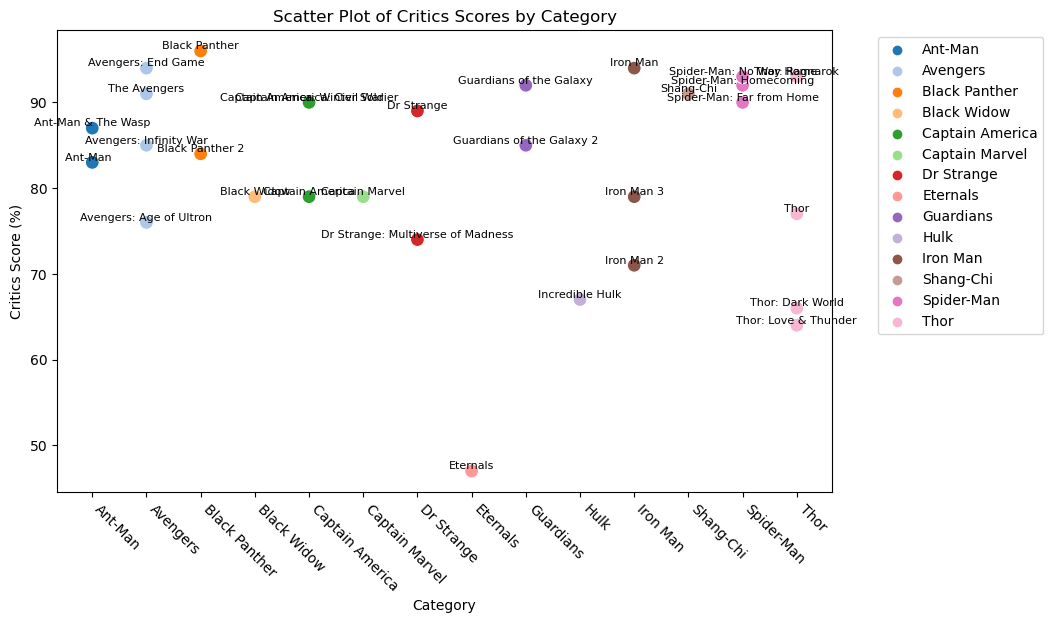

In [16]:
# fill in unique categories
marvel_movies_altcat = marvel_movies.copy()
marvel_movies_altcat.iloc[7, 1] = 'Black Widow'
marvel_movies_altcat.iloc[11, 1] = 'Captain Marvel'
marvel_movies_altcat.iloc[14, 1] = 'Eternals'
marvel_movies_altcat.iloc[17, 1] = 'Hulk'
marvel_movies_altcat.iloc[21, 1] = 'Shang-Chi'

# critics % score by category
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='category', y='critics % score', data=marvel_movies_altcat, hue='category', palette='tab20', s=100)

for i, txt in enumerate(marvel_movies_altcat['film']):
    plt.annotate(txt, (marvel_movies_altcat['category'][i], marvel_movies_altcat['critics % score'][i]), ha='center', va='bottom', fontsize = 8)


plt.xlabel('Category')
plt.ylabel('Critics Score (%)')
plt.title('Scatter Plot of Critics Scores by Category')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=-45, ha='left', ticks=range(len(marvel_movies_altcat['category'].unique())), 
           labels=marvel_movies_altcat['category'].unique())

# Show the plot
plt.show()

# Segmentation and Targeting

## Data Cleaning

In [17]:
# read in regional_families.csv dataset
regional_families = pd.read_csv('regional_families.csv')

In [18]:
regional_families.head()

,householdID,dietary_spec,dist_park,email_sub,est_inc,hhold_size,leisure_perc,oldest,passholder,previous_attend,social_media_scale,youngest
0,1,None,0.9,No,62641.584126,2,0.08,92,1,1,0.70,13
1,2,None,23.8,Yes,70127.969071,3,0.21,41,1,4,0.29,24
2,3,None,27.3,No,112130.429602,1,0.11,67,1,1,0.08,67
3,4,None,20.7,No,76096.440915,2,0.04,31,1,1,0.99,1
4,5,Gluten-Free,55.1,Yes,79925.089485,6,0.27,52,0,0,0.22,25


In [19]:
regional_families.drop('householdID', axis=1, inplace=True)

In [20]:
regional_families.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dietary_spec        8500 non-null   object 
 1   dist_park           8500 non-null   float64
 2   email_sub           8500 non-null   object 
 3   est_inc             8500 non-null   float64
 4   hhold_size          8500 non-null   int64  
 5   leisure_perc        8500 non-null   float64
 6   oldest              8500 non-null   int64  
 7   passholder          8500 non-null   int64  
 8   previous_attend     8500 non-null   int64  
 9   social_media_scale  8500 non-null   float64
 10  youngest            8500 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 730.6+ KB


In [21]:
# change email_sub to binary variable
regional_families['email_sub'] = regional_families['email_sub'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

## Variable Selection

<Figure size 1000x800 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Matrix')

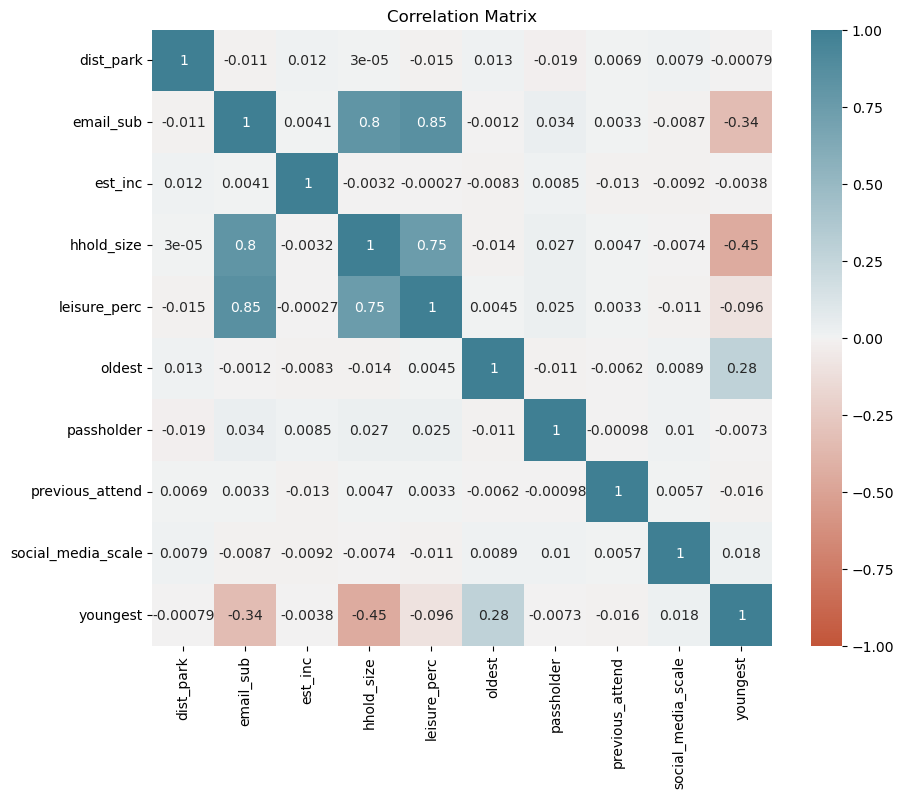

In [22]:
# check for highly correlated variables to avoid redundancy
correlation_matrix = regional_families.corr()

# Custom colormap
cmap = sns.diverging_palette(20, 220, as_cmap=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0, vmin=-1, vmax=1)

plt.title('Correlation Matrix')
plt.show()

- to avoid redundancy and reduce dimensionality, take a subset of our dataset

In [23]:
columns = ['dist_park', 'email_sub', 'est_inc', 'previous_attend', 'youngest']
regional_fam_num = regional_families[columns]

## K-means Clustering

### Elbow Chart

KMeans(n_clusters=1, random_state=654)

KMeans(n_clusters=2, random_state=654)

KMeans(n_clusters=3, random_state=654)

KMeans(n_clusters=4, random_state=654)

KMeans(n_clusters=5, random_state=654)

KMeans(n_clusters=6, random_state=654)

KMeans(n_clusters=7, random_state=654)

KMeans(random_state=654)

KMeans(n_clusters=9, random_state=654)

KMeans(n_clusters=10, random_state=654)

KMeans(n_clusters=11, random_state=654)

KMeans(n_clusters=12, random_state=654)

KMeans(n_clusters=13, random_state=654)

KMeans(n_clusters=14, random_state=654)

<AxesSubplot:>

Text(0.5, 1.0, 'The Elbow Method')

Text(0.5, 0, 'k')

Text(0, 0.5, 'SSE')

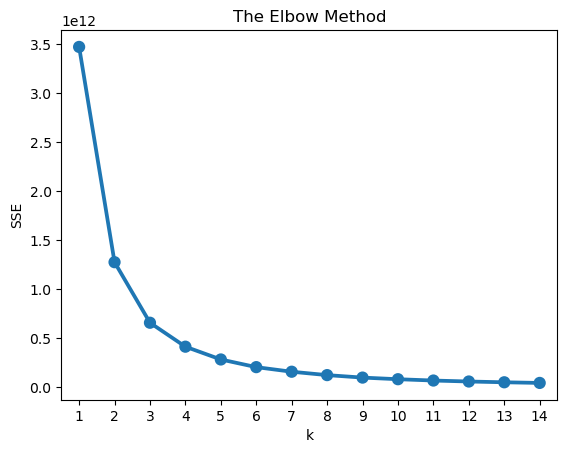

In [24]:
# Try different values of k (number of clusters)
sse = {}
for k in range(1, 15):
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=654) 
    
    # Fit KMeans on the normalized dataset 
    kmeans.fit(regional_fam_num) 
    sse[k] = kmeans.inertia_

sns.pointplot(x=list(sse.keys()), y=list(sse.values()));
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')

In [25]:
scaler = StandardScaler()
regional_fam_num_standardized = scaler.fit_transform(regional_fam_num)

# kmeans model with 3 clusters
kmeans = KMeans(n_clusters=5, random_state=654)
kmeans.fit(regional_fam_num_standardized)

KMeans(n_clusters=5, random_state=654)

### Summary Statistics for Clusters

In [26]:
cluster_labels = kmeans.labels_
regional_fam_k5 = regional_fam_num.assign(Cluster = cluster_labels)
regional_fam_k5.groupby(['Cluster']).agg({
    'dist_park' : 'mean',
    'email_sub': 'mean',
    'est_inc' : 'mean',
    'previous_attend':'mean',
    'youngest':['mean', 'count'],
}).round(2)

dist_park email_sub   est_inc previous_attend youngest      
             mean      mean      mean            mean     mean count
Cluster                                                             
0           16.36      0.00  77958.98            1.82    67.07  1694
1           15.38      1.00  78267.23            1.60    22.94  2735
2           68.98      0.36  79401.55            1.97    29.94   762
3           16.24      0.46  77607.60            4.56    26.49   985
4           14.50      0.00  77408.64            1.55    21.80  2324

**Cluster 0**: Seniors. This cluster has the highest average age for each household and the lowest possible email subscription value, meaning they, on average, have no subscription. Most likely, within these households, there are older folk such as grandparent(s) living with their families or the household simply only contains seniors. Though the average attendance is the third highest so perhaps the seniors visit the park with their grandchildren. To target this cluster, it would be best to focus on bettering park amenities for seniors, such as availability of benches, transportation (such as motorized scooters), and plenty of rest spots.  

**Cluster 1**: Engaged Residents. This cluster has the highest average email subscription value, meaning at least one person in the household subscribes to Lobster Land’s promotional emails. These households are among the most likely to attend the winter event. Their average distance to the park is also quite low. Since this cluster is very enthusiastic about the park’s events, it would be best to hold more limited time events. They could highlight them in their mass emails and advertise heavily when new rides/events pop up. 

**Cluster 2**: Day Trip Enthusiasts. This cluster, on average, lives the furthest away from the park, and by quite a bit as well. However, they do visit the park fairly often. These people enjoy coming to the park for a day trip or vacation. Since these people live quite far, it would be best to consider collaborating with travel agencies, perhaps providing special travel bundles and discounts to encourage a longer stay near the park. This way, they will be enticed to spending more time at Lobster Land. Another way to do this is social media, displaying views in and around the park encourage others to travel. 

**Cluster 3**: Young Souls. This cluster has the highest attendance value and average age of 26. These are households that still value the children in themselves and visit the theme park often for the thrills. Though they refuse to subscribe to keep their inboxes clean. The best way to reach this cluster would be through social media, new rides, and seasonal promotions. Perhaps the best way to do this would be through collaborations with popular brands such as Coke, fast food chains, etc.

**Cluster 4**: Park-Adjacent Residents. This cluster lives the closest to Lobster Land and has the lowest average young member. They don’t visit the park often and only go when it’s convenient. It is difficult to target this cluster, because they live so close. Most likely, they won’t feel an incredible drive to visit due to proximity, but there could be a way through increased weekend advertising. Similar to how young people often visit malls and movie theaters on their days off, increasing advertising through more archaic means such as posters, pop up ads, and local marketing; putting up advertisements at local hot spots. 

Based on the elbow plot, it seems that a k value of 3-5 seems appropriate. After running the model with 3, 4, and 5  as the k values, it seems that 5 clusters provides the most distinct mean values for each cluster, as each displays an 'out of line' value for at least one feature. For example, cluster 0 has a particularly high mean value for `youngest`. Cluster 2 displays a very high mean value for `dist park`. Therefore we select five in order to segment the clientele base to better our targeting mechanisms.

<AxesSubplot:xlabel='youngest', ylabel='Count'>

Text(0.5, 1.0, 'KMeans Clustering Youngest')

Text(0.5, 0, 'Youngest Member of Household')

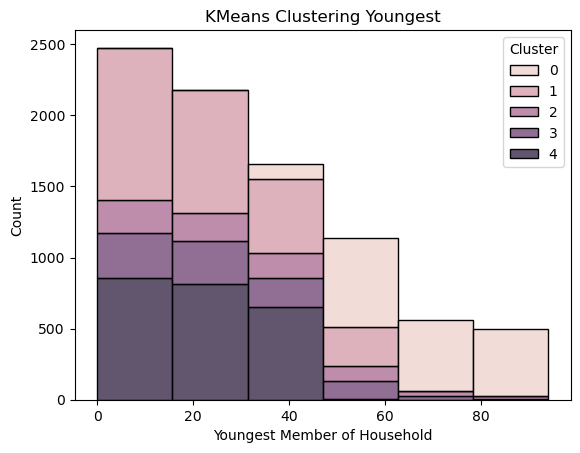

In [27]:
sns.histplot(data=regional_fam_k5, x="youngest", hue="Cluster", multiple='stack',bins=6)
plt.title('KMeans Clustering Youngest')
plt.xlabel('Youngest Member of Household')

Looking at this stacked histogram, it is clear than cluster 0 contains the majority of older folk and clusters 1 and 4 contain the younger folk. 

<AxesSubplot:xlabel='Cluster', ylabel='previous_attend'>

Text(0.5, 1.0, 'KMeans Clustering')

Text(0, 0.5, 'Previous Attendance')

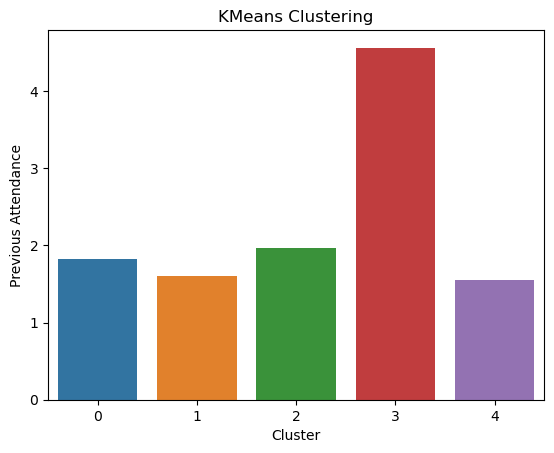

In [28]:
sns.barplot(x='Cluster', y='previous_attend', data=regional_fam_k5, ci=None) 
plt.title('KMeans Clustering')
plt.ylabel('Previous Attendance')

The bar plot displays the number of previous attendances to the park prior to the winter event. There is a clear spike of park attendance in cluster 3.

Text(0.5, 1.0, 'Density Plot KMeans Clustering')

Text(0.5, 9.444444444444438, 'Distance from Park')

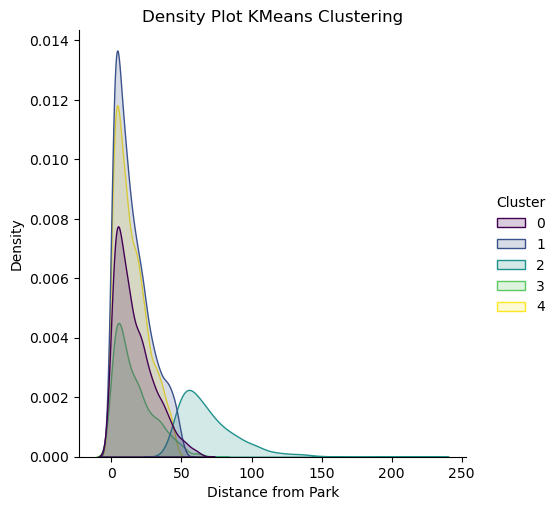

In [29]:
sns.displot(regional_fam_k5, x="dist_park", hue="Cluster", kind='kde', fill=True, palette='viridis', alpha=0.2)
plt.title('Density Plot KMeans Clustering')
plt.xlabel('Distance from Park')

This graph is similar to the stacked histogram above, but it’s a little easier to interpret. There are clear shifts in the distance to the park. The only cluster that seems to stray a little on the higher end is cluster 2.

Text(0.5, 1.0, 'KMeans Clustering Income Distribution')

Text(-21.680555555555557, 0.5, 'Estimated Income')

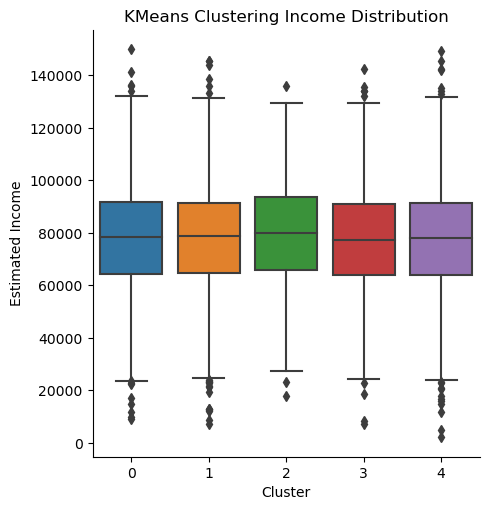

In [30]:
sns.catplot(x="Cluster", y="est_inc", kind="box", data=regional_fam_k5)
plt.title('KMeans Clustering Income Distribution')
plt.ylabel('Estimated Income')

The cat and whisker plot is useful for getting a sense of the distribution of the clusters. While it doesn't seem interesting, because all the income distributions across all clusters are very similar, it is beneficial to know that the average estimated income for all clusters is quite high, sitting at around 80,000$.

Considering the statistics for each cluster, it would be best to prioritize clusters 1 and 4 simply because the counts for these clusters are significantly higher than the others. Since these two clusters live relatively close to the park, we should consider increasing local marketing over television advertising. That way, the park can reduce their costs. This can be done through posters at local restaurants, shopping malls, grocery stores, etc.

# Conjoint Analysis & Memo Section

# Forecasting Total Revenue

In [31]:
disney = pd.read_csv('DIS.csv', index_col='Date', parse_dates=True)

In [32]:
disney.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-06,112.059998,114.339996,111.160004,114.330002,112.080246,10546200
2018-12-07,113.860001,113.989998,111.610001,111.980003,110.627998,8305500
2018-12-10,111.989998,112.290001,109.529999,111.860001,110.509445,7337500
2018-12-11,112.970001,113.720001,111.430000,111.970001,110.618118,6861800
2018-12-12,113.000000,113.980003,112.150002,112.209999,110.855217,7723900


In [33]:
disney['Revenue'] = disney.Close * disney.Volume

<AxesSubplot:xlabel='Date'>

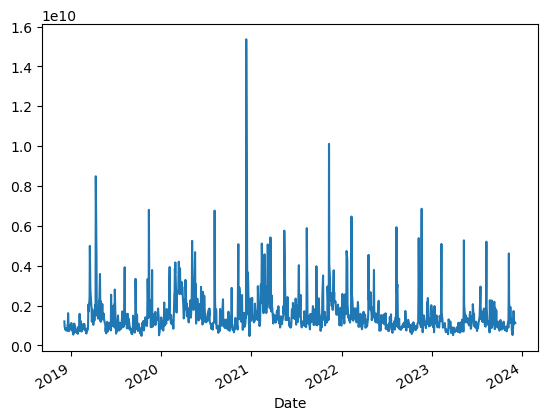

In [34]:
disney.Revenue.plot()

### Holt Forecasting

In [241]:
weekly_mean = disney.Revenue.resample('W').mean()
weekly_mean

Date
2018-12-09    1.067898e+09
2018-12-16    8.128136e+08
2018-12-23    1.047645e+09
2018-12-30    8.510761e+08
2019-01-06    1.022429e+09
                  ...     
2023-11-12    2.238661e+09
2023-11-19    1.329806e+09
2023-11-26    8.206822e+08
2023-12-03    1.280428e+09
2023-12-10    1.140738e+09
Freq: W-SUN, Name: Revenue, Length: 262, dtype: float64

In [242]:
model = Holt(weekly_mean, initialization_method='estimated')
fit = model.fit()
fit.summary()

/Users/dz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Revenue,No. Observations:,262
Model:,Holt,SSE,98911736709367480320.000
Optimized:,True,AIC,10611.773
Trend:,Additive,BIC,10626.046
Seasonal:,None,AICC,10612.102
Seasonal Periods:,None,Date:,"Wed, 06 Dec 2023"
Box-Cox:,False,Time:,19:58:57
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2878571,alpha,True
smoothing_trend,0.0001,beta,True


<AxesSubplot:xlabel='Date'>

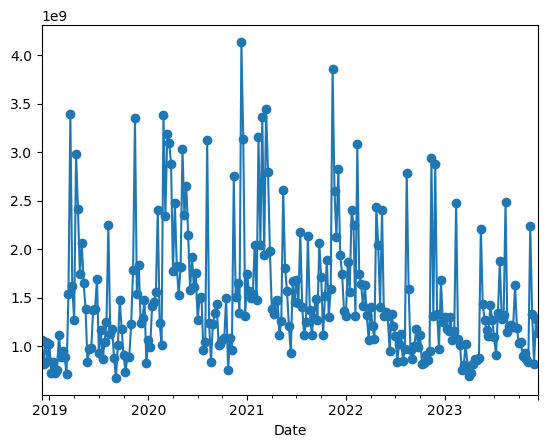

In [243]:
weekly_mean.plot(marker='o')

In [244]:
fit.forecast(3)

2023-12-17    1.151216e+09
2023-12-24    1.140127e+09
2023-12-31    1.129038e+09
Freq: W-SUN, dtype: float64

In [245]:
model2 = Holt(weekly_mean, initialization_method='estimated', damped_trend=True)
fit2 = model2.fit()
fit2.summary()

/Users/dz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Revenue,No. Observations:,262
Model:,Holt,SSE,98668614712239357952.000
Optimized:,True,AIC,10613.128
Trend:,Additive,BIC,10630.970
Seasonal:,None,AICC,10613.569
Seasonal Periods:,None,Date:,"Wed, 06 Dec 2023"
Box-Cox:,False,Time:,19:58:57
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2878571,alpha,True
smoothing_trend,0.0001,beta,True


### Naive Method Subsetting Last 3 Months for the past 5 years

In [246]:
# only keep rows where month is october, november, december
filtered_data = disney[(disney.index.month >= 10) & (disney.index.month <= 12)]

### ARIMA

In [248]:
results_df = pd.DataFrame({"p":p_l, "q":q_l, "aic":aic_l})
results_df.sort_values("aic")

,p,q,aic
18,3,3,11339.470031
15,3,0,11339.750359
19,3,4,11340.130721
12,2,2,11340.187296
23,4,3,11340.591128
20,4,0,11341.245566
16,3,1,11341.729649
8,1,3,11342.079091
17,3,2,11342.170510
22,4,2,11342.603240


In [263]:
harrymod = SARIMAX(weekly_mean, order=(3, 0, 3), trend='c')
results = harrymod.fit()
results.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.16222D+01    |proj g|=  4.53750D-02

At iterate    5    f=  2.16216D+01    |proj g|=  4.70252D-03

At iterate   10    f=  2.16205D+01    |proj g|=  1.23106D-02

At iterate   15    f=  2.16204D+01    |proj g|=  6.72999D-03

At iterate   20    f=  2.16185D+01    |proj g|=  8.85913D-02

At iterate   25    f=  2.16135D+01    |proj g|=  2.88595D-02

At iterate   30    f=  2.16104D+01    |proj g|=  4.51643D-02

At iterate   35    f=  2.16098D+01    |proj g|=  3.61871D-02

At iterate   40    f=  2.16097D+01    |proj g|=  2.39667D-03

At iterate   45    f=  2.16097D+01    |proj g|=  3.83404D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  262
Model:               SARIMAX(3, 0, 3)   Log Likelihood               -5661.735
Date:                Wed, 06 Dec 2023   AIC                          11339.470
Time:                        20:01:07   BIC                          11368.017
Sample:                    12-09-2018   HQIC                         11350.944
                         - 12-10-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.467e+08   5.56e-11   1.16e+19      0.000    6.47e+08    6.47e+08
ar.L1          0.1098      0.045      2.463      0.014       0.022       0.197
ar.L2         -0.3562      0.042     -8.480      0.000      -0.439      -0.274
ar.L3          0.8098      0.041     19.920      0.000       0.730       0.889
ma.L1          0.2119      0.077      2.734      0.006       0.060       0.364
ma.L2          0.5366      0.071      7.555      0.000       0.397       0.676
ma.L3         -0.5015      0.083     -6.069      0.000      -0.664      -0.340
sigma2       3.64e+17   2.04e-19   1.78e+36      0.000    3.64e+17    3.64e+17
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               293.85
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                             1.83
Prob(H) (two-sided):                  0.22   Kurtosis:                         6.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.3e+51. Standard errors may be unstable.
"""

In [270]:
forecast = results.get_prediction(start=-50)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
print(forecast)
print

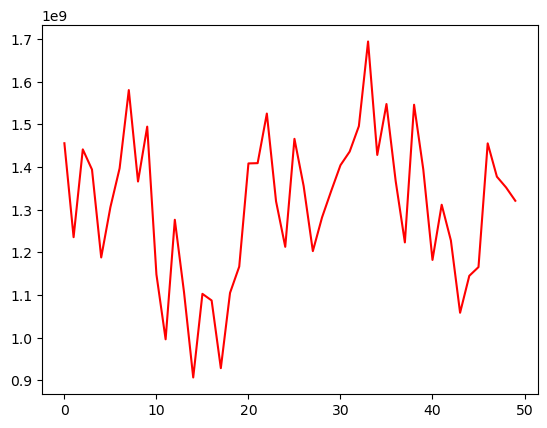

In [265]:
plt.figure()
plt.plot(mean_forecast.values, color='red' , label= 'forecast');

In [266]:
mean_forecast = forecast.predicted_mean
times2 = pd.date_range(start = '2023-01-01', end = '2023-12-10', freq='W')
predictions = pd.Series(mean_forecast.values, index = times2)

<Figure size 1100x500 with 0 Axes>

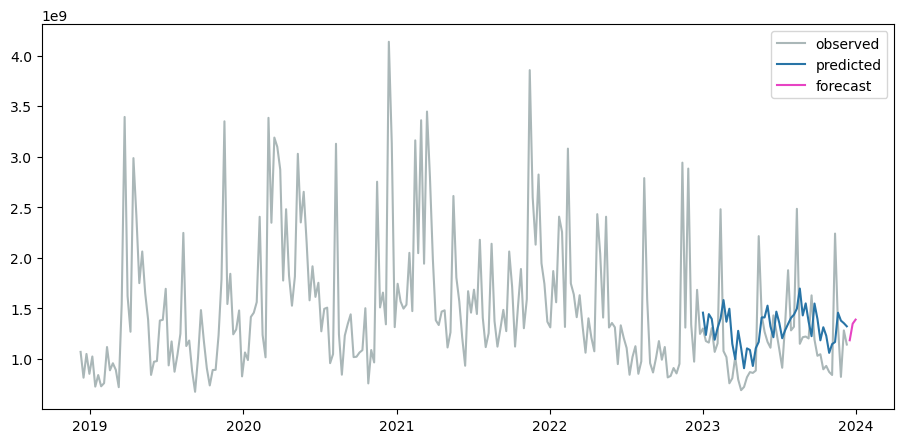

In [282]:
plt.figure(figsize=(11,5))
plt.plot(weekly_mean, label='observed', color='#aab7b8')
plt.plot(predictions, color='#2874a6' , label= 'predicted')
plt.plot(results.forecast(3), color = '#e743c3', label = 'forecast')
plt.legend()

In [269]:
results.forecast(3)

2023-12-17    1.183100e+09
2023-12-24    1.346449e+09
2023-12-31    1.387366e+09
Freq: W-SUN, Name: predicted_mean, dtype: float64

# Classification

# Strategic Memo

# A/B Testing

# Conclusions